Predicted value for is [[400.04846569]]


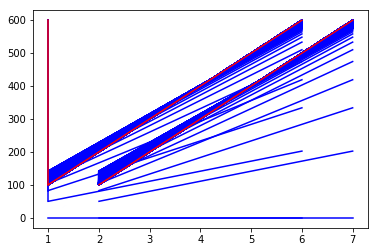

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

independentVariablesCount = 2

#define a function which would use the gradient descent algorithm to converge the cost function
#and find the values of co-effecients
def gradient_descent(X,Y,thetas,numberOfObservations):
    iterations=2000
    learning_factor=0.009

    
    i=0
    figure = plt.figure()

    while (i<iterations):
        i=i+1

        #calculate the predicted value of Y using X and thetas
        y_predicted = X.dot(thetas)

        #calculate cost function
        cost = (1/numberOfObservations)*np.sum(pow((y_predicted-Y),2))

        #find partial derivates of Thetas
        tmp1 =  (y_predicted-Y)*X
        dThetas = (1/numberOfObservations)*np.sum(tmp1,axis=0)
        dThetas = dThetas.reshape(independentVariablesCount+1,1)

        thetas = thetas - learning_factor*dThetas

        plt.plot(X,y_predicted,'blue')
        #print ('cost is {} and thetas is{}'.format(cost,thetas.T))

    plt.plot(X,y_predicted,'red')
    
    return thetas

#assume some values for dependent variable and create a 6*1 ndarray for that.
Y=np.array([[100,200,300,400,500,600]])

#derive number of observations
numberOfObservations = Y.size

#assume there are two independent variables x1,x2
x1=(1,2,3,4,5,6)
x2=(2,3,4,5,6,7)

#create a list for the passed independent variables
listX=list(zip(x1,x2))

#convert the list into a dataframe and derive a ndarrary from dataframe
df=pd.DataFrame(listX)
X=df.values

#create a ndarray of (6,1) dimensions and append to X. This is required to caluclate the intercept later
ones=np.ones((numberOfObservations,1),dtype=int)
X=np.concatenate((ones,X),axis=1)

#Since there are two independent variables and one intercept, initialize a array called thetas which 
#holds the values of these co-effecients and intercept
thetas=np.zeros((independentVariablesCount+1,1),dtype=int)


thetas = gradient_descent(X,Y.T,thetas,numberOfObservations)

testX=np.array([1,4,5])
testX=testX.reshape(1,independentVariablesCount+1)
predicted=testX.dot(thetas)
print ('Predicted value for is {}'.format(predicted))